# Gender Detection
In this project we're gonna predict gender by height, weight and body fat.  
.  
.  
.  

At first we're gonna import all the necessary libraries.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
plt.style.use('ggplot')

Then reading dataset.

In [2]:
bp = pd.read_csv('bodyPerformance.csv')
bp

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0           54.9                     18.4            60.0          217.0     C  
1           36.4                     16.3            53.0          229.0     A  
2           44.8                     12.0            49.0          181.0     C  
3           41.4                     15.2            53.0          219.0     B  
4           43.5                     27.1            45.0          217.0     B  
...          ...                      ...             ...            ...   ...  
13388       35.8                     17.4            47.0          198.0     C  
13389       33.0                      1.1            48.0          167.0     D  
13390       63.5                     16.4            45.0          229.0     A  
13391       19.3                      9.2             0.0           75.0     D  
13392       35.9                      7.1            51.0          180.0     C  

[13393 rows x 12 columns]

In [3]:
pandas_profiling.ProfileReport(bp)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In this part, we're gonna separate useful features and target to X and y.  
  
Then split them to train and test.

In [4]:
X = bp[['height_cm', 'weight_kg', 'body fat_%']]

y = bp['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

In [5]:
X_train

height_cm  weight_kg  body fat_%
5549       160.8      59.60        33.9
9555       170.6      68.30        18.7
2965       167.4      71.20        23.2
5215       160.3      56.80        35.9
12982      173.9      60.06         8.4
...          ...        ...         ...
12768      169.3      71.60        17.8
1941       162.2      60.90        28.0
8929       169.0      68.10        25.5
2865       170.2      73.60        21.6
9428       178.6      72.80        22.2

[9375 rows x 3 columns]

In [6]:
X_test

height_cm  weight_kg  body fat_%
2175       156.4      52.80        32.8
12470      171.5      86.10        24.9
11211      168.3      68.00        23.4
7142       174.3      65.90        16.4
1791       174.7      72.10        15.5
...          ...        ...         ...
10843      163.7      58.40        10.3
4089       164.9      59.50        25.6
10356      166.6      66.00        18.3
8008       169.2      71.70        24.6
4456       159.5      54.12        30.4

[4018 rows x 3 columns]

In [7]:
y_train

5549     F
9555     M
2965     M
5215     F
12982    M
        ..
12768    M
1941     F
8929     M
2865     M
9428     M
Name: gender, Length: 9375, dtype: object

In [8]:
y_test

2175     F
12470    M
11211    M
7142     M
1791     M
        ..
10843    M
4089     F
10356    M
8008     M
4456     F
Name: gender, Length: 4018, dtype: object

Here we define color list for plotting scatter matrix in the next cell.

In [9]:

color = [1 if i == 'M' else 0 for i in y_train]

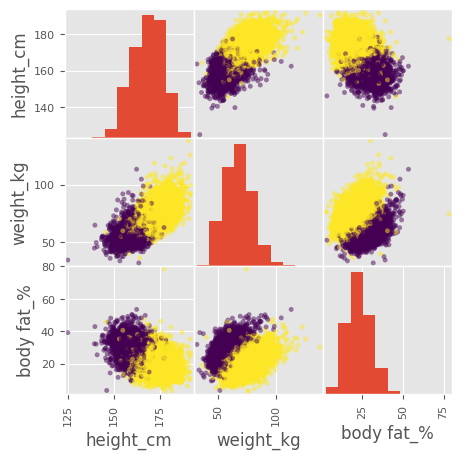

In [10]:
_ = pd.plotting.scatter_matrix(X_train, c=color, figsize=(5, 5), s=50)

finally in this section by using knn algorithm we're gonna train our model.  
  
And by using grid search CV we're gonna find the best n_neighbors for model.

In [11]:
param_grid = {'n_neighbors': np.arange(1, 100)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [12]:
knn_cv.best_params_

{'n_neighbors': 26}

In [13]:
knn_cv.best_score_

0.95712

In [14]:
y_pred = knn_cv.predict(X_test)

In [15]:
knn_cv.score(X_test, y_test)

0.9529616724738676

In [16]:
print(confusion_matrix(y_test, y_pred))

[[1387   91]
 [  98 2442]]


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           F       0.93      0.94      0.94      1478
           M       0.96      0.96      0.96      2540

    accuracy                           0.95      4018
   macro avg       0.95      0.95      0.95      4018
weighted avg       0.95      0.95      0.95      4018



Now enter your information and try it yourself.

In [18]:
print('Gender Detection Program')
height = int(input('Please enter your height (by cm):        '))
weight = int(input('Please enter your weight (by kg):        '))
bodyFat = int(input('Please enter your body fat (by percent): '))

if knn_cv.predict(pd.DataFrame({'height_cm': [height], 'weight_kg': [weight], 'body fat_%': [bodyFat]})) == 'M':
    gender = 'Male'
else:
    gender = 'Female'

print('Gender for this inputs is: {}'.format(gender))

#loop = bool(input('Are you wanna continue?(Yes-> 1  or  No-> 0) '))

Gender Detection Program
Gender for this inputs is: Male
